# 1-) <font color="red">LinearRegression </font>: -
## For predicting continuous valued output (eg.-> car price, house price, weather)

# 2-) Logistic Regression : - (For solving classification problems)
## For predicting categorical variables (eg.-> spam or not, buy insurance or not, vote for which party etc.)

# <font color="green">Classification Types</font> ->
## 1-) Binary classification (spam or not)
## 2-) MultiClass Classification (voting for which party)

# <font color="blue">Classification Types</font>
<ul>
    <li>Binary Classification</li>
    <li>Multiclass Classification</li>
</ul>

In [160]:
import pandas as pd
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

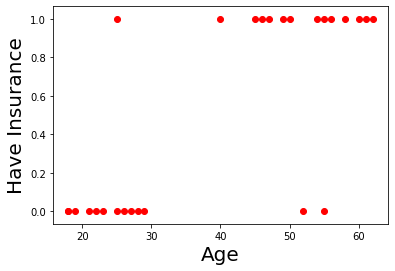

In [162]:
plt.xlabel('Age', fontsize=20)
plt.ylabel('Have Insurance', fontsize=20)
plt.scatter(df['age'],df['bought_insurance'],color="red")

In [163]:
X = df[['age']]
Y = df.bought_insurance

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

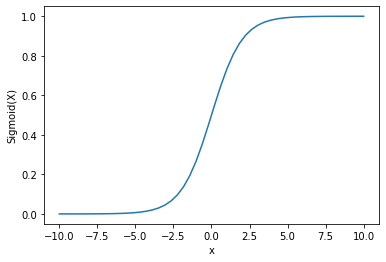

In [165]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

In [166]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [167]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

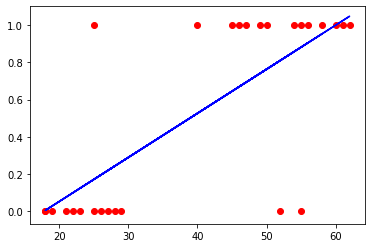

In [168]:
plt.scatter(df['age'],df['bought_insurance'],color="red")
plt.plot(X,reg.predict(X),color="blue")

In [169]:
df.shape

(27, 2)

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [171]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
x_test

,age
13,29
7,60
20,21
16,25
12,27
21,26


In [173]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0])

In [174]:
model.score(x_test,y_test)

0.8333333333333334

In [175]:
model.predict_log_proba(x_test)

array([[-0.17073185, -1.85181277],
       [-3.02453855, -0.04979992],
       [-0.05447869, -2.93706142],
       [-0.09721474, -2.37904657],
       [-0.1291566 , -2.11061298],
       [-0.11211552, -2.24375962]])

In [176]:
model.predict([[43]])

array([1])

In [177]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[4, 0],
       [1, 1]])

<h1> <font color="green">Exercise</font> </h1>

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


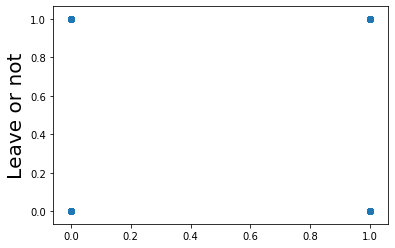

In [180]:
plt.ylabel("Leave or not", fontsize=20)
plt.scatter(df['promotion_last_5years'],df['left'])

In [181]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [182]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

In [183]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [184]:
pd.crosstab(df.left,df['Department'])

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


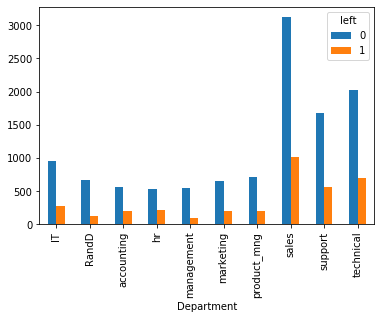

In [185]:
pd.crosstab(df['Department'],df.left).plot(kind="bar")

In [186]:
pd.crosstab(df.left,df.salary)

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


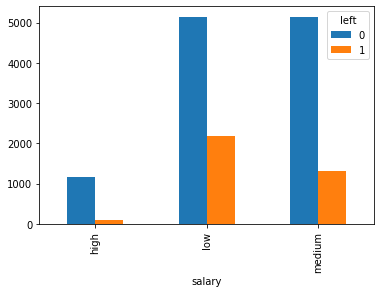

In [187]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

In [188]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [189]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [190]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


# Logistic Regression with multiple variables.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [192]:
digits = load_digits()

In [193]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [194]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [195]:
len(digits.data)

1797

<Figure size 432x288 with 0 Axes>

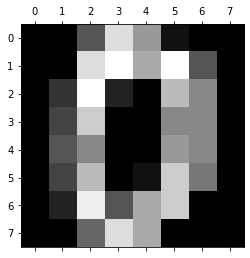

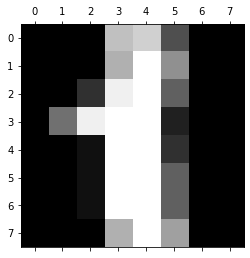

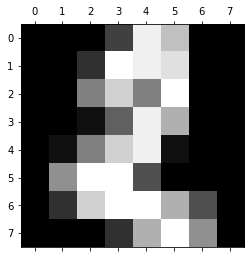

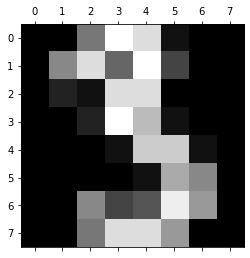

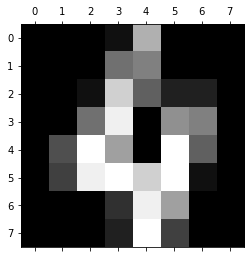

In [196]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [197]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [198]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [199]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [200]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [201]:
model.fit(x_train,y_train)

/home/coder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
model.score(x_test,y_test)

0.9555555555555556

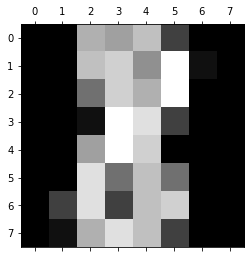

In [203]:
plt.matshow(digits.images[40])

In [204]:
digits.target[40]

8

In [205]:
model.predict([digits.data[40]])

array([8])

In [206]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 38,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 36,  0,  2],
       [ 0,  2,  2,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]])

Text(69.0, 0.5, 'Actual')

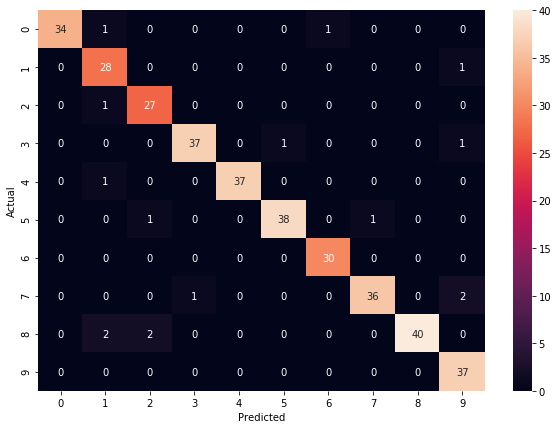

In [207]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [208]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [209]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [211]:
iris.feature_names[0:4]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [212]:
iris.target[0]

0

In [213]:
for i in iris.target:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [214]:
iris.target_names[0]

'setosa'

In [215]:
iris.target_names[1]

'versicolor'

In [230]:
dataset = load_iris()
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [237]:
data = pd.DataFrame(dataset['data'],columns=['sepal length','sepal width','petal length','petal width'])
data['species']=dataset['target']
data['species']=data['species'].apply(lambda x: dataset['target_names'][x])
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [242]:
X = data.iloc[:,0:4]
Y = data.species

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [248]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [249]:
model.fit(x_train,y_train)

/home/coder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
model.score(x_test,y_test)

1.0

In [275]:
dic = dict()
dic['versicolor'] = 0
dic['setosa'] = 0
dic['virginica'] = 0
for ind,val in y_test.items():
    dic[val] +=1
print(dic['setosa'],' ',dic['versicolor'],' ',dic['virginica'])

10   7   13


In [252]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 13]])

Text(24.0, 0.5, 'Actual')

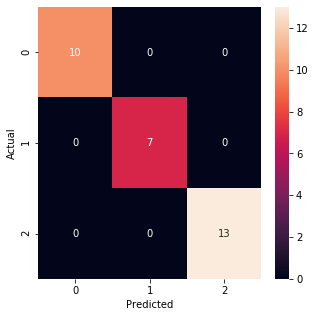

In [253]:
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')